### Implement Edge Detection

Write a Python function using OpenCV that takes an image file path as input, applies Canny edge detection on the image, and displays the original and edge-detected images side by side.

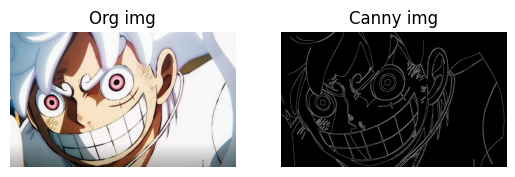

In [1]:
# Write Your code here.
import cv2
import numpy as np
import matplotlib.pyplot as plt
def combine_img(img_path):
    src_img = cv2.imread(img_path)
    resize_img = cv2.resize(src_img,(1200,720))
    src_img_rgb = cv2.cvtColor(resize_img,cv2.COLOR_BGR2RGB)
    Canny_img = cv2.Canny(resize_img,100,200)
    #plotting org img
    plt.subplot(1,2,1)
    plt.imshow(src_img_rgb)
    plt.title('Org img')
    plt.axis('off')
    #plotting canny img
    plt.subplot(1,2,2)
    plt.imshow(Canny_img , cmap = 'gray')
    plt.title('Canny img')
    plt.axis('off')
    plt.show()
#enter img path below
img_path = "E:\\luffy.jpg"
img = combine_img(img_path)
img

### Face and Eye Detection

Create a function that detects faces and eyes in a given image using Haar cascades in OpenCV. The function should draw rectangles around detected faces and eyes and display the output image.

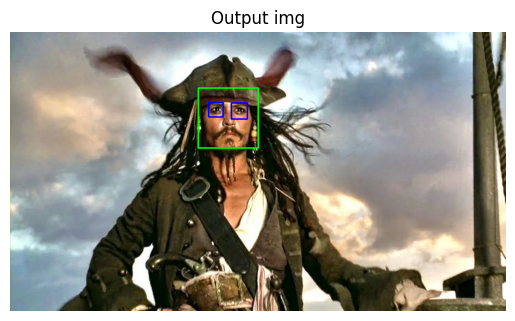

In [2]:
# Write Your code here.
import cv2
import numpy as np
import matplotlib.pyplot as plt
def face_detect(img_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml') 
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    color_img = cv2.imread(img_path)
    #converting to gray img
    gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    #rect around face
    faces = face_cascade.detectMultiScale(gray_img ,1.3,3)
    x,y,w,h = faces[0]
    rect_face = cv2.rectangle(color_img,(x,y),(x+w,y+h),[0,255,0],2)
    #rect around eyes
    eyes = eye_cascade.detectMultiScale(gray_img,1.3,5)
    for ex,ey,ew,eh in eyes:
        rect = cv2.rectangle(color_img,(ex,ey),(ex+ew,ey+eh),[255,0,0],2)
    color_img_rgb = cv2.cvtColor(color_img,cv2.COLOR_BGR2RGB)
    plt.imshow(color_img_rgb)
    plt.axis('off')
    plt.title('Output img')
    plt.show()
#enter img path below
img_path = "E:\\jack.jpg"
new_img = face_detect(img_path)

###Image Cropping Based on Facial Features

Write a function that takes an image path as input and detects faces. If exactly one face is detected, return the cropped image of the face. Use Haar cascades for face detection.

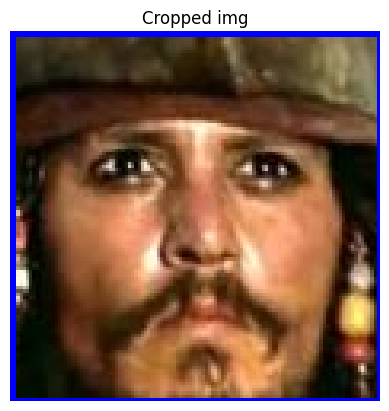

In [3]:
# Write Your code here.
def crop_face(img_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    color_img = cv2.imread(img_path)
    #converting to grayscale img
    gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    #rect around face
    faces = face_cascade.detectMultiScale(gray_img,1.3,3)
    if faces.shape[0] == 1:
        x,y,w,h = faces[0]
        rect_face = cv2.rectangle(color_img,(x,y),(x+w,y+h),[255,0,0],2)
        face_img = cv2.cvtColor(color_img[y:y+h,x:x+w],cv2.COLOR_BGR2RGB)
        plt.imshow(face_img)
        plt.title('Cropped img')
        plt.axis('off')
        plt.show()
    else:
        print('No or multiple faces detected!!!')
#enter img path below
img_path = "E:\\jack.jpg"
crop_img = crop_face(img_path)
crop_img 

### Feature Matching with ORB
Create a Python script that uses ORB to detect and match features between two images. The script should display the matched keypoints on the output image.

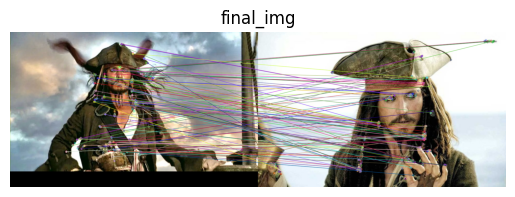

In [4]:
# Write Your code here.
def ORB_detect(img_path1,img_path2):
    #read imgs
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    #convert to grayscale img
    gray_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #ORB detector
    orb = cv2.ORB_create()
    #keypoints and descriptors
    kp1,des1 = orb.detectAndCompute(gray_img1,None)
    kp2,des2 = orb.detectAndCompute(gray_img2,None)
    #Matching
    matcher = cv2.BFMatcher()
    matches = matcher.match(des1,des2)
    #drawing
    final_img = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100],None)
    output_img = cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB)
    plt.imshow(output_img)
    plt.title('final_img')
    plt.axis('off')
    plt.show()
img_path1,img_path2 = "E:\\jack.jpg" , "E:\\jack1.jpg"
img = ORB_detect(img_path1,img_path2)
img

### Applying Gaussian Blur for Noise Reduction
Write a function that applies a Gaussian blur to an image to reduce noise and displays both the original and blurred images.

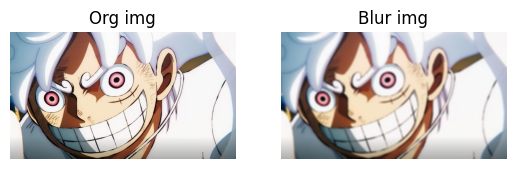

In [5]:
# Write Your code here.
def Blur_img(img_path):
    img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    blur_img = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
    rgb_blur = cv2.cvtColor(blur_img,cv2.COLOR_BGR2RGB)
    #plotting org img
    plt.subplot(1,2,1)
    plt.imshow(rgb_img)
    plt.title('Org img')
    plt.axis('off')
    #plotting blur img
    plt.subplot(1,2,2)
    plt.imshow(rgb_blur , cmap = 'gray')
    plt.title('Blur img')
    plt.axis('off')
    plt.show()
img_path = "E:\\luffy.jpg"
blur = Blur_img(img_path)
blur

### Pyramid Transform for Image Scaling
Create a function that creates a pyramid of images (both up and down) for a given image and displays the results.

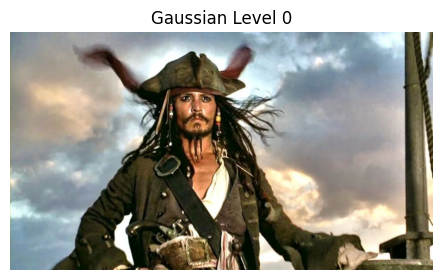

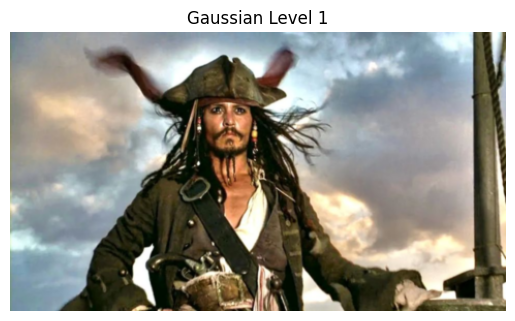

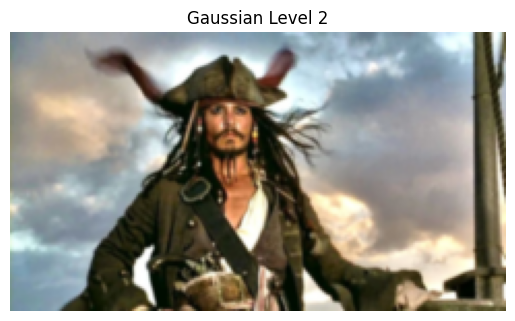

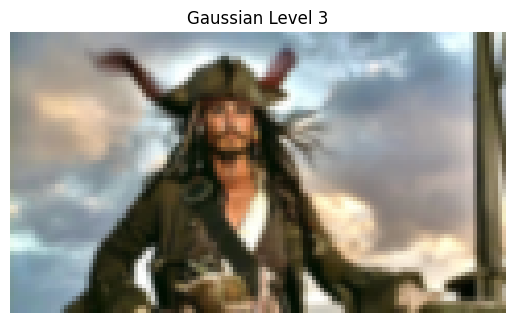

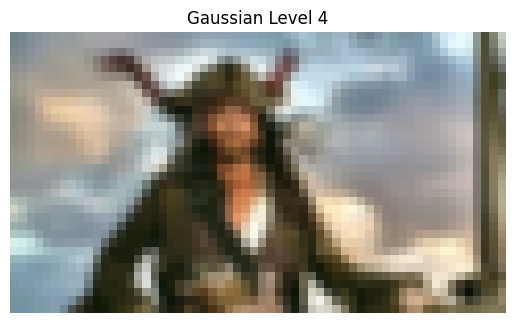

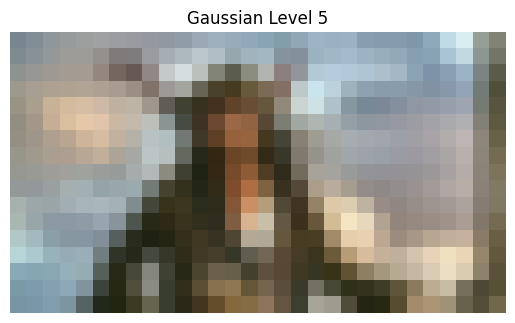

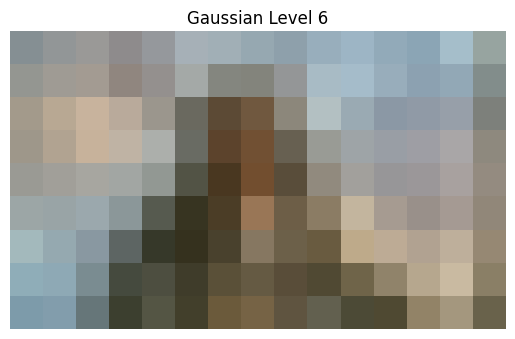

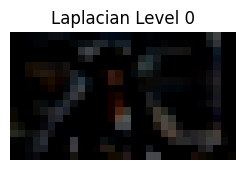

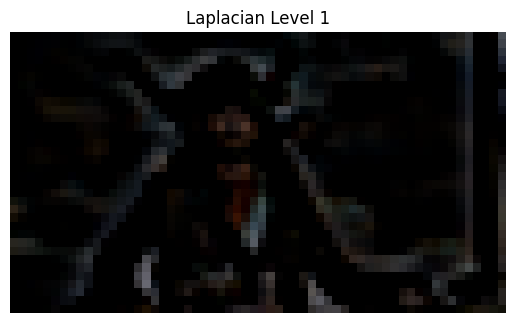

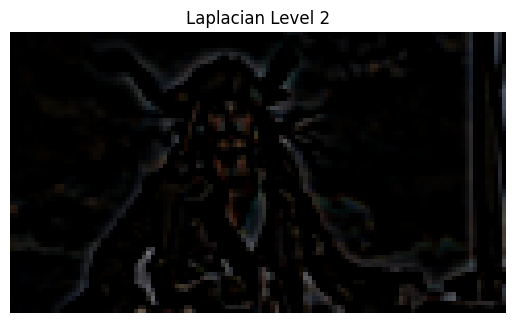

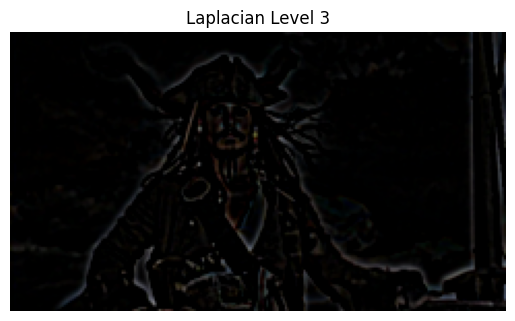

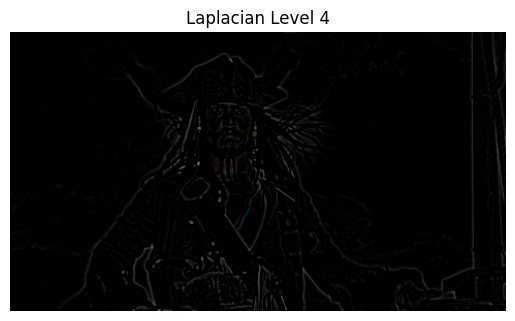

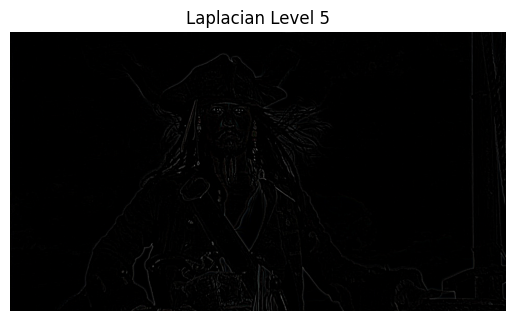

In [6]:
# Write Your code here.
import cv2
import numpy as np
import matplotlib.pyplot as plt
def pyramid_transform(image, levels):
    gaussian_pyramid = [image]
    
    for i in range(1, levels):
        image = cv2.pyrDown(image) 
        gaussian_pyramid.append(image)

    laplacian_pyramid = []
    for i in range(levels - 1, 0, -1):
        expanded = cv2.pyrUp(gaussian_pyramid[i])
        
        if expanded.shape != gaussian_pyramid[i-1].shape:
            expanded = cv2.resize(expanded, (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0]))
        
        laplacian = cv2.subtract(gaussian_pyramid[i-1], expanded)
        laplacian_pyramid.append(laplacian)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for i, img in enumerate(gaussian_pyramid):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Gaussian Level {i}")
        plt.axis('off')
        plt.show()

    plt.subplot(1, 2, 2)
    for i, img in enumerate(laplacian_pyramid):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Laplacian Level {i}")
        plt.axis('off')
        plt.show()

image = cv2.imread("E:\\jack.jpg")  
pyramid_transform(image, 7)

### Implement Harris Corner Detection in Python
Write a Python function using OpenCV that takes an image file as input and applies the Harris Corner Detection algorithm. Your function should display the original image with the detected corners marked. Include parameters to specify the block size, ksize, and free parameter for flexibility.

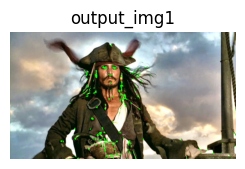

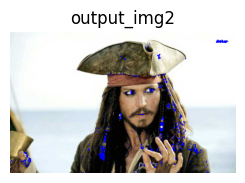

In [7]:
# Write Your code here.
def harriscorner(img_path1,img_path2,block_size,k_size):
    #read imgs
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    #convert to grayscale img
    gray_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #converting to float type
    float1 = np.float32(gray_img1)
    float2 = np.float32(gray_img2)
    #detecting corners
    corner1 = cv2.cornerHarris(gray_img1,block_size,k_size,0.04)
    corner2 = cv2.cornerHarris(gray_img2,block_size,k_size,0.04)
    #dilating
    corner1 = cv2.dilate(corner1,None)
    corner2 = cv2.dilate(corner2,None)
    #drawing rectangle
    img1[corner1>0.01*corner1.max()] = [0,255,0]
    img2[corner2>0.01*corner2.max()] = [255,0,0]
    rgb_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    rgb_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    #plotting img1
    plt.subplot(1,2,1)
    plt.imshow(rgb_img1)
    plt.axis('off')
    plt.title('output_img1')
    plt.show()
    #plotting img2
    plt.subplot(1,2,2)
    plt.imshow(rgb_img2)
    plt.axis('off')
    plt.title('output_img2')
    plt.show()
img_path1,img_path2 = "E:\\jack.jpg" , "E:\\jack1.jpg"
block_size = 2
k_size = 3
img = harriscorner(img_path1,img_path2,block_size,k_size)
img

### SIFT Keypoint Detection and Description
Create a function that reads an image, converts it to grayscale, and then applies the SIFT algorithm to detect keypoints and compute descriptors. Ensure the detected keypoints are visualized on the original image.

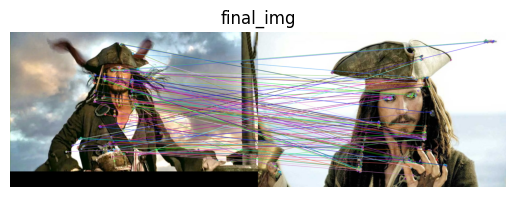

In [8]:
# Write Your code here.
import cv2
def SIFT_detect(img_path):
    #read imgs
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    #convert to grayscale img
    gray_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #SIFT detector
    sift = cv2.SIFT_create()
    #keypoints and descriptors
    kp1,des1 = sift.detectAndCompute(gray_img1,None)
    kp2,des2 = sift.detectAndCompute(gray_img2,None)
    #Matching
    matcher = cv2.BFMatcher()
    matches = matcher.match(des1,des2)
    #drawing
    final_img = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100],None)
    output_img = cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB)
    plt.imshow(output_img)
    plt.title('final_img')
    plt.axis('off')
    plt.show()
img_path1,img_path2 = "E:\\jack.jpg" , "E:\\jack1.jpg"
img = ORB_detect(img_path1,img_path2)
img

### Feature Matching using ORB
Develop a Python script that matches features between two images using the ORB algorithm. The script should display the matched features between the two images with lines connecting corresponding keypoints.

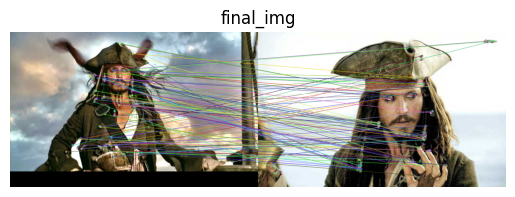

In [9]:
# Write Your code here.
def ORB_detect(img_path1,img_path2):
    #read imgs
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    #convert to grayscale img
    gray_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #ORB detector
    orb = cv2.ORB_create()
    #keypoints and descriptors
    kp1,des1 = orb.detectAndCompute(gray_img1,None)
    kp2,des2 = orb.detectAndCompute(gray_img2,None)
    #Matching
    matcher = cv2.BFMatcher()
    matches = matcher.match(des1,des2)
    #drawing
    final_img = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100],None)
    output_img = cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB)
    plt.imshow(output_img)
    plt.title('final_img')
    plt.axis('off')
    plt.show()
img_path1,img_path2 = "E:\\jack.jpg" , "E:\\jack1.jpg"
img = ORB_detect(img_path1,img_path2)
img

### Implement FAST Corner Detection
Write a Python function to implement the FAST corner detection algorithm. The function should accept an image and return the image with detected keypoints highlighted.

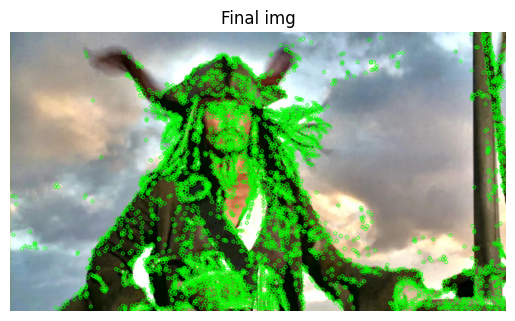

In [10]:
# Write Your code here.
def FAST_corner(img_path):
    color_img = cv2.imread(img_path)
    #converting to grayscale img
    gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    #FAST corner
    fast = cv2.FastFeatureDetector_create()
    #detecting keypoints
    kp = fast.detect(gray_img,None)
    #drawing keypoints
    img_kp = cv2.drawKeypoints(color_img,kp,None,[0,255,0])
    final_img = cv2.cvtColor(img_kp,cv2.COLOR_BGR2RGB)
    #displaying image
    plt.imshow(final_img)
    plt.axis('off')
    plt.title('Final img')
    plt.show()
#enter the img path below
img_path = "E:\\jack.jpg"
img = FAST_corner(img_path)
img

Tough questions

### Custom Canny Edge Detector Implementation
Implement your own version of the Canny edge detection algorithm from scratch using Python (without using OpenCV functions). Your implementation should include:

Gaussian filtering for noise reduction.
Calculation of gradient magnitude and direction.
Non-maximum suppression.
Hysteresis thresholding. Your function should take an image as input and return an image with detected edges.

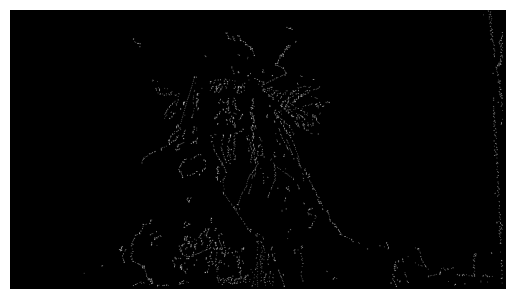

In [11]:
# Write Your code here.
import cv2
import numpy as np
import matplotlib.pyplot as plt
def gaussian_kernel(sigma):
    sigma = float(sigma)
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * 
                     np.exp(- ((x - 2) * 2 + (y - 2) * 2) / (2 * sigma ** 2)),
        (5, 5)
    )
    return kernel / np.sum(kernel)

def apply_gaussian_filter(img, kernel):
    img_array = np.array(img)
    output_array = np.zeros(img_array.shape, dtype=np.float32)
    for i in range(0,img_array.shape[0]-4):
        for j in range(0, img_array.shape[1]-4):
            sub_array = img_array[i:i+5 , j:j+5]
            value = np.sum(sub_array*kernel)
            output_array[i,j] = value
    return output_array            

def gradient_magnitude_and_direction(img):
    img_array = np.array(img)
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2],
                        [-1, 0, 1]]) 
    sobel_y = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]])  
    
    sobel_x_applied = np.zeros(img_array.shape, dtype=np.float32)
    for k in range(0, 3):
        for i in range(0,img_array.shape[0] - 2):
            for j in range(0, img_array.shape[1] - 2):
                sub_array = img_array[i:i+3 , j:j+3]
                value = np.sum(sub_array*sobel_x)
                sobel_x_applied[i,j] = value

    sobel_y_applied = np.zeros(img_array.shape, dtype=np.float32)
    for k in range(0, 3):
        for i in range(0,img_array.shape[0] - 2):
            for j in range(0, img_array.shape[1] - 2):
                sub_array = img_array[i:i+3 , j:j+3]
                value = np.sum(sub_array*sobel_y)
                sobel_y_applied[i,j] = value
    
    magnitude = np.sqrt(sobel_x_applied**2 + sobel_y_applied**2)
    direction = np.arctan2(sobel_x_applied,sobel_y_applied) * (180.0 / np.pi) 
    
    direction = np.around(direction / 45) * 45
    return magnitude, direction

def non_maximum_suppression(magnitude, direction):
    m, n = magnitude.shape
    output = np.zeros_like(magnitude)
    
    for i in range(1, m-1):
        for j in range(1, n-1):
            angle = direction[i, j]
            if (angle == 0):
                if (magnitude[i, j] >= magnitude[i, j-1]) and (magnitude[i, j] >= magnitude[i, j+1]):
                    output[i, j] = magnitude[i, j]
            elif (angle == 45):
                if (magnitude[i, j] >= magnitude[i-1, j+1]) and (magnitude[i, j] >= magnitude[i+1, j-1]):
                    output[i, j] = magnitude[i, j]
            elif (angle == 90):
                if (magnitude[i, j] >= magnitude[i-1, j]) and (magnitude[i, j] >= magnitude[i+1, j]):
                    output[i, j] = magnitude[i, j]
            elif (angle == 135):
                if (magnitude[i, j] >= magnitude[i-1, j-1]) and (magnitude[i, j] >= magnitude[i+1, j+1]):
                    output[i, j] = magnitude[i, j]
    
    return output

def hysteresis_thresholding(magnitude, low_threshold, high_threshold):
    m, n = magnitude.shape
    edges = np.zeros_like(magnitude)
    
    strong_edges = magnitude > high_threshold
    weak_edges = (magnitude >= low_threshold) & (magnitude <= high_threshold)
    
    edges[strong_edges] = 1
    
    for i in range(1, m-1):
        for j in range(1, n-1):
            if weak_edges[i, j]:
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    edges[i, j] = 1
    
    return edges

def canny_edge_detection(img, low_threshold, high_threshold, sigma):
    kernel = gaussian_kernel(sigma)
    smoothed_image = apply_gaussian_filter(img, kernel)
    
    magnitude, direction = gradient_magnitude_and_direction(smoothed_image)
    
    suppressed_image = non_maximum_suppression(magnitude, direction)
    
    edges = hysteresis_thresholding(suppressed_image, low_threshold, high_threshold)
    
    return edges

img_path = "E:\\jack.jpg"
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
sigma = float(input('Enter sigma  value: '))
low_threshold = int(input('Enter lower threshold: '))
high_threshold = int(input('Enter upper threshold'))

canny_edge_detected_img = canny_edge_detection(img, low_threshold, high_threshold, sigma)
canny_edge_detected_img = np.uint8(canny_edge_detected_img)
plt.imshow(canny_edge_detected_img , cmap = 'gray')
plt.axis('off')
plt.show()


### Multi-Scale Feature Detection
Create a function that applies multi-scale feature detection using the Laplacian of Gaussian (LoG) method. This function should take an image and a list of sigma values as input, and return an image or set of images showing detected features at the different scales.

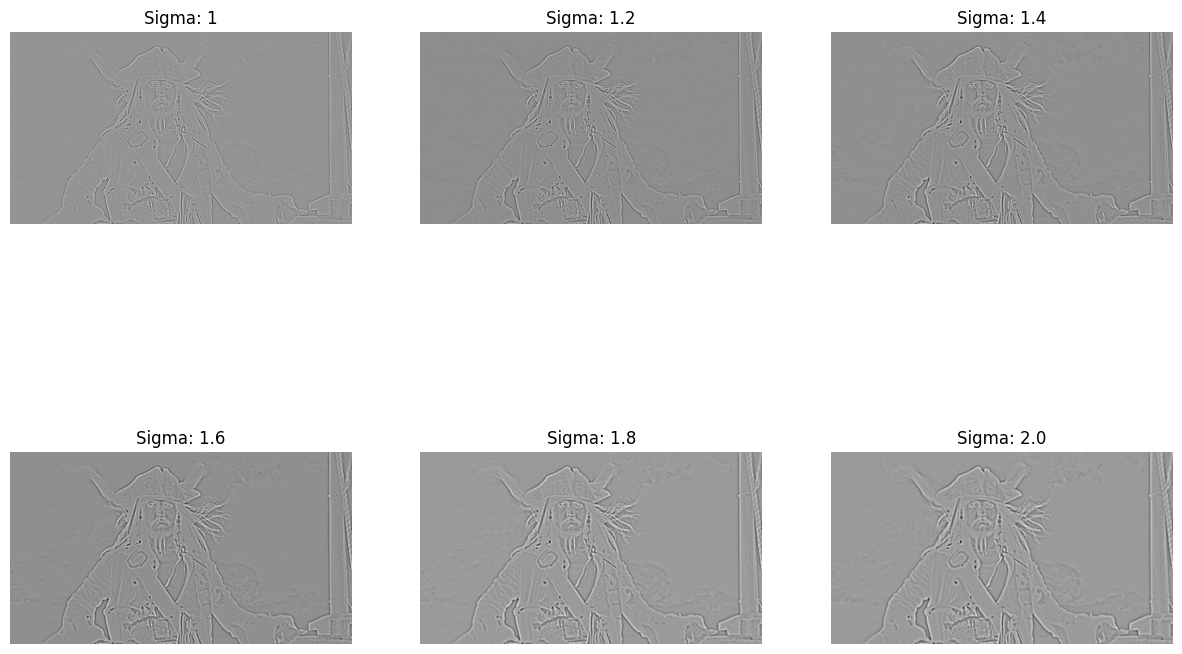

In [12]:
# Write Your code here.
import cv2
import numpy as np
import matplotlib.pyplot as plt
def multi_scale_detect(img,sigmas):
    LoG_detect_img = []
    for sigma in sigmas:    
        size = int(6*sigma+1) | 1
        blur_img = cv2.GaussianBlur(img,(size,size),sigma)
        LoG_img = cv2.Laplacian(blur_img,cv2.CV_64F)
        LoG_normalize = cv2.normalize(LoG_img,None,0,255,cv2.NORM_MINMAX)
        LoG_detect_img.append(LoG_normalize.astype(np.uint8))
    return LoG_detect_img
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
sigmas = [1,1.2,1.4,1.6,1.8,2.0]
images = multi_scale_detect(img,sigmas)
plt.figure(figsize=(15, 10)) 
for i,(sigma,image) in enumerate(zip(sigmas,images)): 
    plt.subplot(2, 3, i + 1) 
    plt.title(f'Sigma: {sigma}') 
    plt.imshow(image, cmap='gray') 
    plt.axis('off') 
plt.show()

## Bonus Question

Do your Research on how can we make a 3d model from the Refined frames.  

In [13]:
### Write your answer here.
